In [2]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("clean_data.csv")
print(df.describe(include='object'))


C:\Users\ambra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Unnamed: 0.1        ID Customer_ID      Month    Name Occupation  \
count         150001    150000      150000     150000  135000     139500   
unique        150001    150000       12500         12   10139         15   
top                0  \n0x160a   CUS_0xd40  September  Stevex     Lawyer   
freq               1         1          12      12500      66       9899   

         Type_of_Loan Changed_Credit_Limit Credit_Mix  Credit_History_Age  \
count          132888               150000     120000              136500   
unique           6260                 3771          3                 408   
top     Not Specified                    _   Standard  17Yearsand11Months   
freq             2112                 3150      54858                 628   

       Payment_of_Min_Amount               Payment_Behaviour Credit_Score  
count                 150000                          138600       100000  
unique                     3                               6            3  
top  

In [ ]:
df.Age.value_counts()

In [ ]:
df.Age.value_counts().plot(kind='bar')

In [ ]:
# get customer id for nan values in Name Column
customer_IDs = df[(df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)]['Customer_ID'].values

In [ ]:
customer_IDs

In [ ]:
# get real age by customer id
for id in customer_IDs:
    realAge = 0
    try:
        realAge = df.loc[(df['Customer_ID'] == id) & (df['Age'].notna()) & (df['Age'] < 100) & (df['Age'] > 0)]['Age'].values[-1]
    except IndexError:
        continue
    # fill missing value
    df.loc[(df['Customer_ID'] == id) & ((df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)), ['Age']] = realAge

In [ ]:
df.Age.value_counts().plot(kind='bar')

In [ ]:
df['Annual_Income'].describe()

In [ ]:
df.Annual_Income.plot(kind='line')

Credit History Age

In [ ]:
def convert_to_years_months(duration):
    if isinstance(duration, float):
        return duration
    years = 0
    months = 0
    if 'Years' in duration:
        years = int(duration.split('Years')[0])
    if 'Months' in duration:
        months = int(duration.split('Months')[0].split('Yearsand')[-1])
    return years + months / 12

df['Credit_History_Age_float'] = df['Credit_History_Age'].apply(convert_to_years_months)

df.head()


In [ ]:
df['Credit_History_Age_float'].describe()

In [ ]:
df['Credit_History_Age_float'].plot(kind='box')

Total EMI per Month

In [4]:
df['Total_EMI_per_month'].describe()

count    150000.000000
mean       1432.513579
std        8403.759977
min           0.000000
25%          30.947775
50%          71.280006
75%         166.279555
max       82398.000000
Name: Total_EMI_per_month, dtype: float64

<AxesSubplot:>

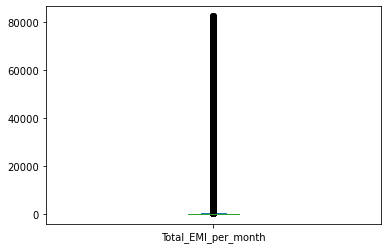

In [5]:
df['Total_EMI_per_month'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

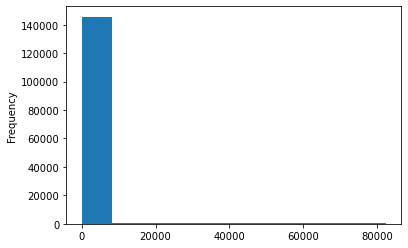

In [6]:
df['Total_EMI_per_month'].plot(kind='hist')

(array([153., 157., 166., 135., 134., 139., 150., 143., 158., 144., 125.,
        157., 154., 146., 137., 147., 150., 142., 141., 143., 132., 152.,
        134., 163., 142., 142., 140., 150., 149., 143.]),
 array([ 8029.        , 10507.96666667, 12986.93333333, 15465.9       ,
        17944.86666667, 20423.83333333, 22902.8       , 25381.76666667,
        27860.73333333, 30339.7       , 32818.66666667, 35297.63333333,
        37776.6       , 40255.56666667, 42734.53333333, 45213.5       ,
        47692.46666667, 50171.43333333, 52650.4       , 55129.36666667,
        57608.33333333, 60087.3       , 62566.26666667, 65045.23333333,
        67524.2       , 70003.16666667, 72482.13333333, 74961.1       ,
        77440.06666667, 79919.03333333, 82398.        ]),
 <BarContainer object of 30 artists>)

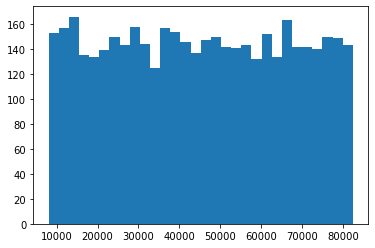

In [12]:

filtered_df = df[df['Total_EMI_per_month'] > 8000]
len(filtered_df)
plt.hist(filtered_df['Total_EMI_per_month'], bins= 30)



In [17]:

def replace_outliers(df, col_name):
    def replace_group_outliers(group):
        mean = group[col_name].mean()
        std = group[col_name].std()
        mode = group[col_name].mode()
        threshold = 2 * std  # Define your threshold here, based on standard deviation

        group.loc[group[col_name] != mode[0], col_name] = pd.NA
        return group

    return df.groupby('Customer_ID').apply(replace_group_outliers)



df = replace_outliers(df, 'Total_EMI_per_month')
print(df['Total_EMI_per_month'])

def fill_group(group, col_name):
    mode = group[col_name].mode()

    # Replace outliers with mode
    group[col_name] = group[col_name].fillna(mode[0])

    return group

# Function to fill missing values and handle outliers
def fill_missing_values(df, col_name):
    grouped = df.groupby('Customer_ID')
    filled_df = grouped.apply(fill_group, col_name=col_name)
    return filled_df


df = fill_missing_values(df, 'Total_EMI_per_month')

print(df)
print(df['Total_EMI_per_month'].describe())

0         49.574949
1         49.574949
2         49.574949
3         49.574949
4         18.816215
            ...    
149995    35.104023
149996    35.104023
149997    35.104023
149998    35.104023
149999    35.104023
Name: Total_EMI_per_month, Length: 150000, dtype: object
        Unnamed: 0 Unnamed: 0.1         ID Customer_ID      Month  \
0                0            0   \n0x160a   CUS_0xd40  September   
1                1            1   \n0x160b   CUS_0xd40    October   
2                2            2   \n0x160c   CUS_0xd40   November   
3                3            3   \n0x160d   CUS_0xd40   December   
4                4            4   \n0x1616  CUS_0x21b1  September   
...            ...          ...        ...         ...        ...   
149995      149995     \n149995  \n0x25fe9  CUS_0x942c      April   
149996      149996     \n149996  \n0x25fea  CUS_0x942c        May   
149997      149997     \n149997  \n0x25feb  CUS_0x942c       June   
149998      149998     \n149998  

In [18]:
df

,Unnamed: 0,Unnamed: 0.1,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0,\n0x160a,CUS_0xd40,September,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,...,Good,809.98,35.030402,22Yearsand9Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
1,1,1,\n0x160b,CUS_0xd40,October,Aaron Maashoh,24.0,Scientist,19114.12,1824.843333,...,Good,809.98,33.053114,22Yearsand10Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN
2,2,2,\n0x160c,CUS_0xd40,November,Aaron Maashoh,24.0,Scientist,19114.12,1824.843333,...,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,NaN
3,3,3,\n0x160d,CUS_0xd40,December,Aaron Maashoh,NaN,Scientist,19114.12,1824.843333,...,Good,809.98,32.430559,23Yearsand0Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,NaN
4,4,4,\n0x1616,CUS_0x21b1,September,Rick Rothackerj,28.0,NaN,34847.84,3037.986667,...,Good,605.03,25.926822,27Yearsand3Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,\n149995,\n0x25fe9,CUS_0x942c,April,Nicks,25.0,Mechanic,39628.99,3359.415833,...,NaN,502.38,34.663572,31Yearsand6Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
149996,149996,\n149996,\n0x25fea,CUS_0x942c,May,Nicks,25.0,Mechanic,39628.99,3359.415833,...,NaN,502.38,40.565631,31Yearsand7Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
149997,149997,\n149997,\n0x25feb,CUS_0x942c,June,Nicks,25.0,Mechanic,39628.99,3359.415833,...,Good,502.38,41.255522,31Yearsand8Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
149998,149998,\n149998,\n0x25fec,CUS_0x942c,July,Nicks,25.0,Mechanic,39628.99,3359.415833,...,Good,502.38,33.638208,31Yearsand9Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [19]:
df['Total_EMI_per_month'].describe()

count    150000.000000
mean        112.087769
std         141.649157
min           0.000000
25%          29.784265
50%          67.712225
75%         151.290071
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

In [20]:

filtered_df = df[df['Total_EMI_per_month'] > 500]
len(filtered_df)
df.Total_EMI_per_month.value_counts()
#plt.hist(filtered_df['Total_EMI_per_month'], bins= 30)



0.000000      16176
49.574949        12
250.108999       12
10.516560        12
303.291740       12
              ...  
123.097440       12
80.576532        12
56.747677        12
39.628117        12
35.104023        12
Name: Total_EMI_per_month, Length: 11153, dtype: int64

In [ ]:
df['Total_EMI_per_month'].plot(kind='box')


Amount invested monthly

In [21]:
df.Amount_invested_monthly.value_counts()

10000.000000    6480
0.000000         275
236.642682         1
76.016863          1
70.783724          1
                ... 
42.635590          1
348.509399         1
235.790325         1
177.951836         1
167.163865         1
Name: Amount_invested_monthly, Length: 136497, dtype: int64

(array([1.15532e+05, 1.58240e+04, 4.09700e+03, 1.05800e+03, 2.18000e+02,
        4.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.48000e+03]),
 array([    0.        ,   333.33333333,   666.66666667,  1000.        ,
         1333.33333333,  1666.66666667,  2000.        ,  2333.33333333,
         2666.66666667,  3000.        ,  3333.33333333,  3666.66666667,
         4000.        ,  4333.33333333,  4666.66666667,  5000.        ,
         5333.33333333,  5666.66666667,  6000.        ,  6333.33333333,
         6666.66666667,  7000.        ,  7333.33333333,  7666.66666667,
         8000.        ,  8333.33333333,  8666.66666667,  9000.        ,
         9333.33333333,  9666.66666667, 10000.        ])

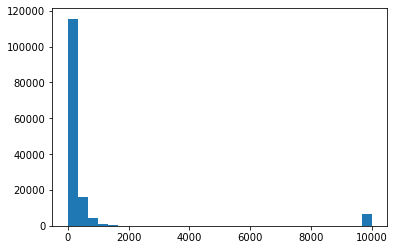

In [23]:
plt.hist(df['Amount_invested_monthly'], bins= 30)


In [24]:
df['Amount_invested_monthly'].describe()

count    143250.000000
mean        638.826309
std        2046.843019
min           0.000000
25%          74.533842
50%         135.791445
75%         266.110841
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

I don t think it s outside the realm of possibility for them to invest 10000 a month if they re really rich but now it depends what everyone else thinks as well

Monthly balance

In [26]:
df['Monthly_Balance'].describe()

count    1.482380e+05
mean     3.372954e+22
std      3.352927e+24
min      7.759665e-03
25%      2.702471e+02
50%      3.368237e+02
75%      4.705163e+02
max      3.333333e+26
Name: Monthly_Balance, dtype: float64

<AxesSubplot:>

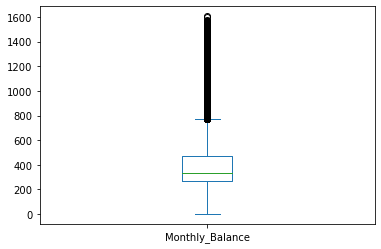

In [30]:
filtered_df = df[df['Monthly_Balance'] < 3.333333e+26]
filtered_df['Monthly_Balance'].plot(kind= 'box')

In [31]:
filtered_df['Monthly_Balance'].describe()

count    148223.000000
mean        402.723009
std         213.844776
min           0.007760
25%         270.241882
50%         336.815865
75%         470.477895
max        1606.518192
Name: Monthly_Balance, dtype: float64